# Predict Cancer Levels


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# pip install openpyxl

* Age: The age of the patient. (Numeric)

* Gender: The gender of the patient. (Categorical)
* Air Pollution: The level of air pollution exposure of the patient. (Categorical)
* Alcohol use: The level of alcohol use of the patient. (Categorical)
* Dust Allergy: The level of dust allergy of the patient. (Categorical)
* OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
* Genetic Risk: The level of genetic risk of the patient. (Categorical)
* chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
* Balanced Diet: The level of balanced diet of the patient. (Categorical)
* Obesity: The level of obesity of the patient. (Categorical)
* Smoking: The level of smoking of the patient. (Categorical)
* Passive Smoker: The level of passive smoker of the patient. (Categorical)
* Chest Pain: The level of chest pain of the patient. (Categorical)
* Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
* Fatigue: The level of fatigue of the patient. (Categorical)
* Weight Loss: The level of weight loss of the patient. (Categorical)
* Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
* Wheezing: The level of wheezing of the patient. (Categorical)
* Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
* Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

* 'Level':{'Low': 1, 'Medium': 2, 'High': 3}


### Loading The Data

In [3]:
data = pd.read_csv('cancer_levels.csv')
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


### EDA

In [4]:
data.shape

(1000, 24)

In [5]:
cols = data.keys()
cols

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [7]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


In [8]:
data['Level'].value_counts()

Level
3    365
2    332
1    303
Name: count, dtype: int64

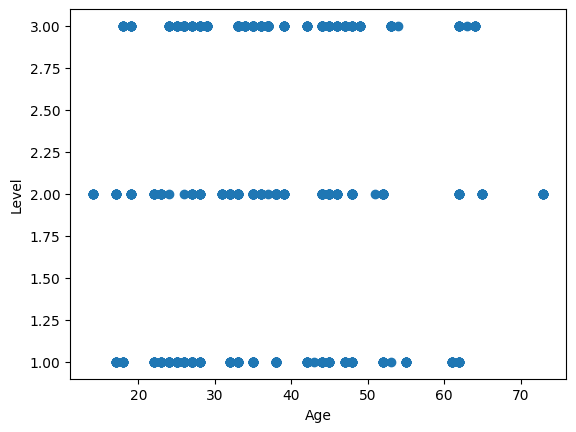

In [9]:
fig , ax = plt.subplots()
ax.scatter(  data['Age'],data['Level'])
ax.set_xlabel("Age")
ax.set_ylabel("Level")
sns.set_palette('rocket')
plt.show()

<Axes: xlabel='Level', ylabel='count'>

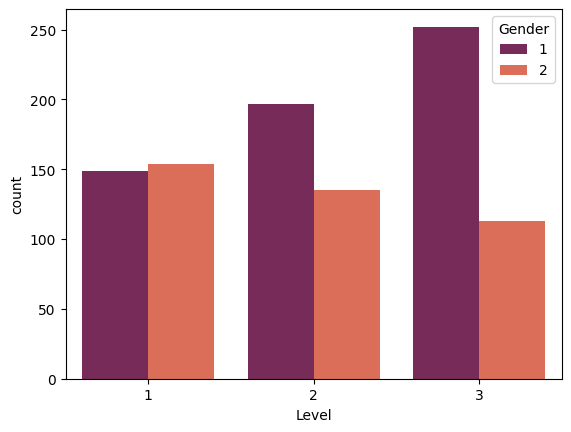

In [10]:
sns.countplot(data=data, x="Level", hue="Gender", palette= 'rocket')

<Axes: >

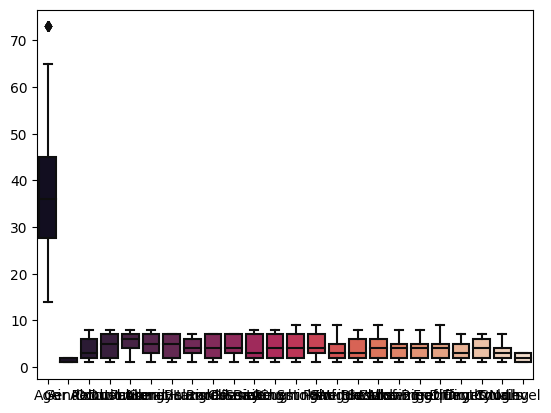

In [11]:
plt.subplots()
sns.boxplot(data, palette= 'rocket')

### Data Cleaning

In [12]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

There is no null values

In [13]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data['Level']= encoder.fit_transform(data['Level'])
# data=data.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})
# data.to_csv('cancer_levels.csv',index = False)

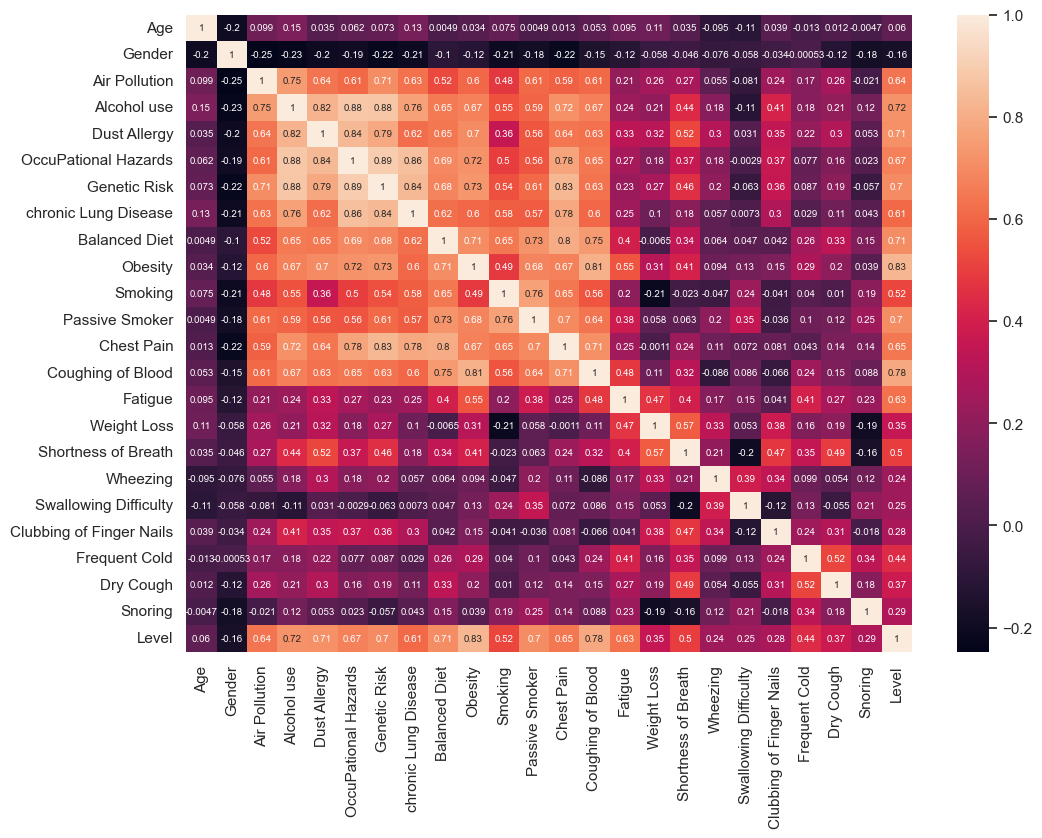

In [14]:
correlation = data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation,annot=True,cmap="rocket", annot_kws={"size":7})
plt.show()

<Axes: >

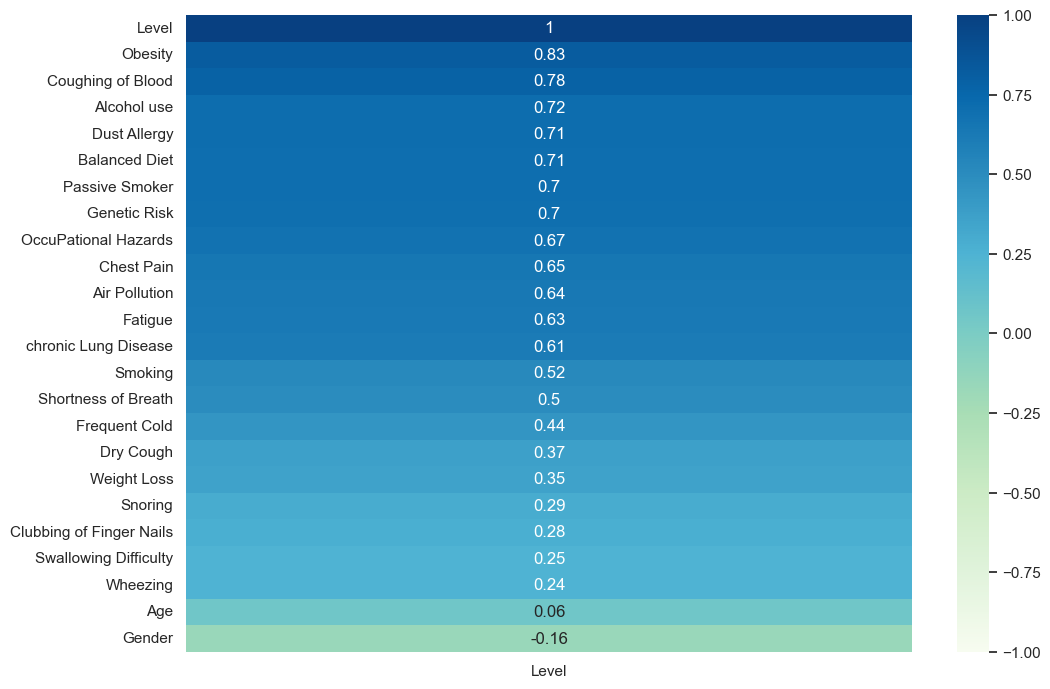

In [15]:
sns.heatmap(data.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')


In [16]:
data['Level'].value_counts()


Level
3    365
2    332
1    303
Name: count, dtype: int64

### Splitting The Data

In [17]:
from sklearn.model_selection import train_test_split

X = data.iloc[: , :-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

### Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Train The Model

## KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))




********************
Test accuracy: 1.0
Train accuracy: 1.0
********************
Confusion Matrix:
[[ 84   0   0]
 [  0  97   0]
 [  0   0 119]]
********************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



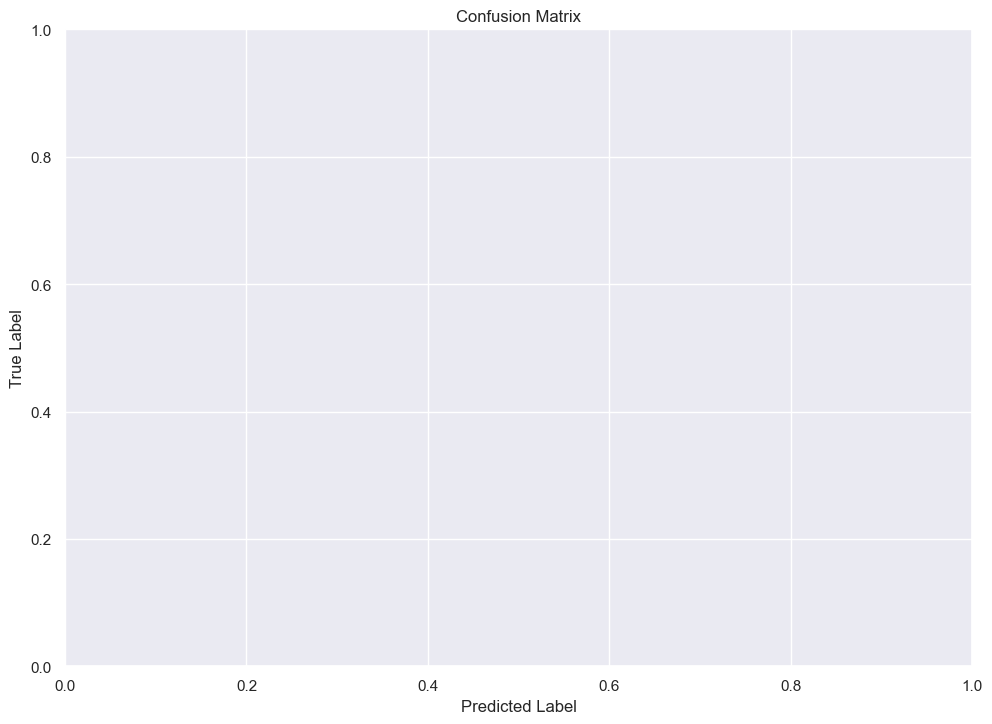

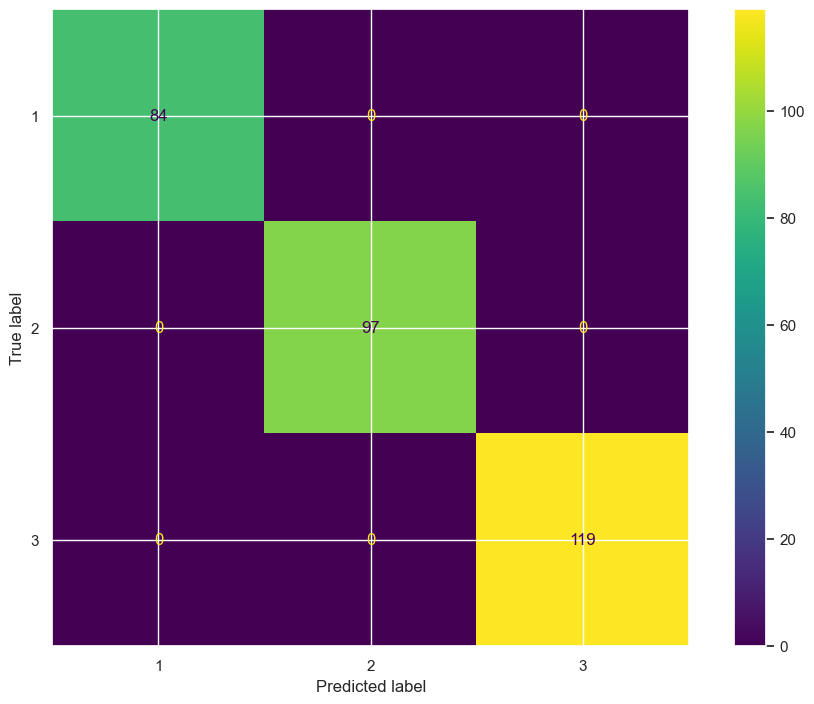

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_prediction, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_model.classes_ )

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
disp.plot()
plt.show()


In [21]:

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# decision tree

In [22]:

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)


********************
********************
Train accuracy: 1.0
Test accuracy: 1.0
********************
[1. 1. 1. 1. 1.]
1.0
********************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

********************
100.0% Accurate
********************


# RandomForest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
train accuracy: 1.0
test accuracy: 1.0
********************
1.0
********************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

********************
100.0% Accurate


# logistic regression

In [24]:
LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 1.0
train accuracy: 1.0
********************


d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.992
********************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

********************
100.0% Accurate


d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

# Feature importance

In [25]:

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
Age,0.005282
Gender,0.000000
Air Pollution,0.036805
Alcohol use,0.049908
Dust Allergy,0.044828
OccuPational Hazards,0.030557
Genetic Risk,0.037568
chronic Lung Disease,0.021362
Balanced Diet,0.043775
Obesity,0.091820


In [26]:
imp_feature=imp_feature[imp_feature['feature importance']>0.04]
b=imp_feature.sort_values('feature importance')
b.index

Index(['Smoking', 'Shortness of Breath', 'Balanced Diet', 'Dust Allergy',
       'Alcohol use', 'Fatigue', 'Wheezing', 'Obesity', 'Passive Smoker',
       'Coughing of Blood'],
      dtype='object')

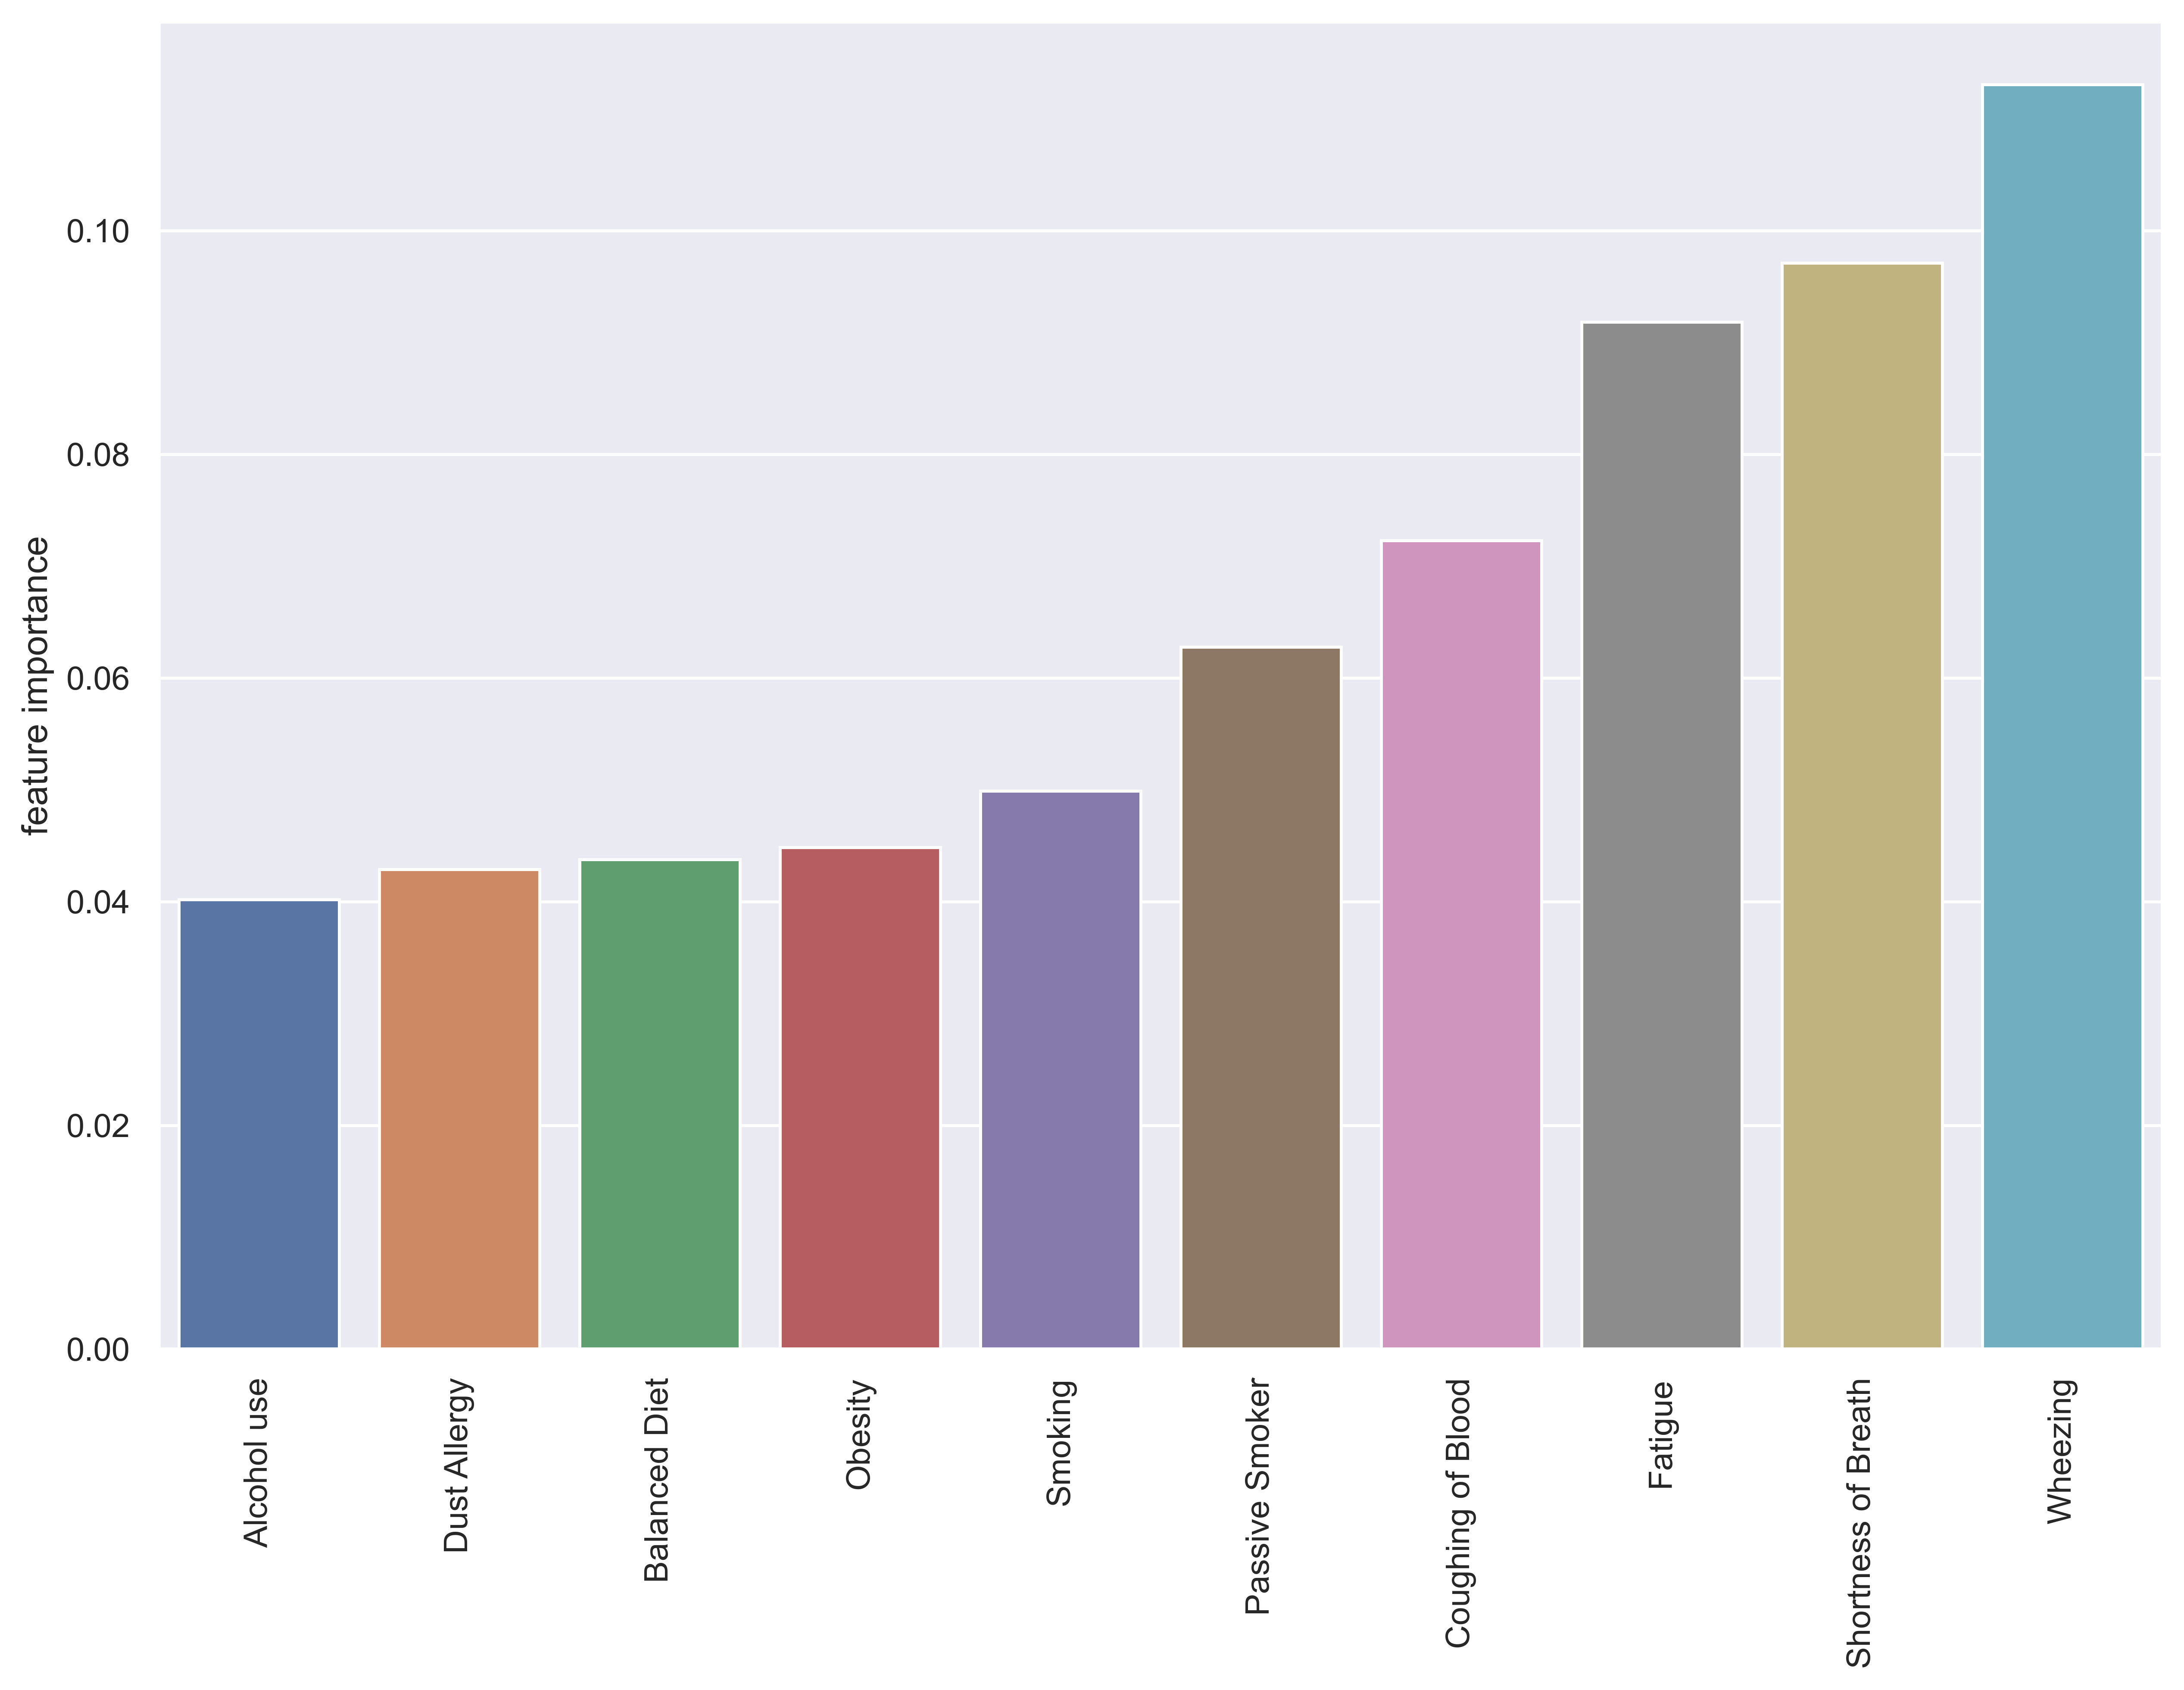

In [27]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [28]:
X=X[['Smoking', 'Shortness of Breath', 'Balanced Diet', 'Dust Allergy',
       'Alcohol use', 'Fatigue', 'Wheezing', 'Obesity', 'Passive Smoker',
       'Coughing of Blood']]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
train accuracy: 1.0
test accuracy: 1.0
********************
1.0
********************
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

********************
100.0% Accurate


In [31]:
import pickle

In [32]:
#save the model
model = rfc  # Your machine learning model object
file_path = 'rf_level.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [33]:
# load the model

file_path = 'rf_level.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [34]:
X_train

,Smoking,Shortness of Breath,Balanced Diet,Dust Allergy,Alcohol use,Fatigue,Wheezing,Obesity,Passive Smoker,Coughing of Blood
541,7,2,7,7,7,5,7,7,8,7
440,7,2,7,7,7,5,7,7,8,7
482,4,3,7,6,3,2,2,2,3,4
422,4,5,7,7,7,4,6,7,8,7
778,2,3,3,4,1,2,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...
106,7,7,6,7,7,8,6,7,7,7
270,2,1,2,2,2,1,2,3,1,1
860,1,2,2,5,1,6,5,4,4,4
435,2,9,6,6,5,8,2,7,3,8


In [35]:
loaded_model.predict([[7,2,7,7,7,5,7,7,8,7]])

d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)